# **Machine Learning**

### Dr. Santosh Chapaneri
### Lead AI Product Engineer, Wolters Kluwer

# Logistic Regression: Predicting who will survive on the Titanic

Based on a [Kaggle competition](http://www.kaggle.com/c/titanic-gettingStarted) where the **goal is to predict survival on the Titanic**, based on real data.

[Kaggle](http://www.kaggle.com/competitions) hosts machine learning competitions where anyone can download a dataset, train a model, and test the predictions on the website. The author of the best model wins a price.

Here, we use this example to introduce **logistic regression, a basic classifier**.


**Goals:**

- **To predict if a passenger survived the sinking of the Titanic or not.**


- **For each PassengerId in the test set, predict a 0 or 1 value for the Survived variable.**

### Note:
Logistic regression is not a regression model, it is a classification model. Yet, it is closely related to linear regression.


This model predicts the probability that a binary variable is 1, by applying a sigmoid function (more precisely, a logistic function) to a linear combination of the variables.

In [28]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load the dataset with Pandas
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Observe columns Pclass, Sex, Age, Survived
titanic[titanic.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


- We will keep only a few fields for this example.

- We also convert the `sex` field to a binary variable, so that it can be handled correctly by NumPy and scikit-learn.

- Finally, we remove the rows containing `NaN` values.

In [23]:
data = titanic[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()
data.head()

,Sex,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


- Now, we convert this `DataFrame` to a NumPy array, so that we can pass it to scikit-learn.

In [24]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

print(X[:5,:])
print(y[:5])

[[ 0 22  3]
 [ 1 38  1]
 [ 1 26  3]
 [ 1 35  1]
 [ 0 35  3]]
[0 1 1 1 0]


- Let's have a look at the **survival of male and female passengers, as a function of their age**:

In [25]:
# Need few boolean vectors
female = (X[:,0] == 1)
survived = (y == 1)

# This vector contains the age of the passengers.
age = X[:,1]

# Compute few histograms
mybins = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=mybins)[0],
     'female': np.histogram(age[survived & female],
                            bins=mybins)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=mybins)[0],
     'female': np.histogram(age[~survived & female],
                            bins=mybins)[0]}

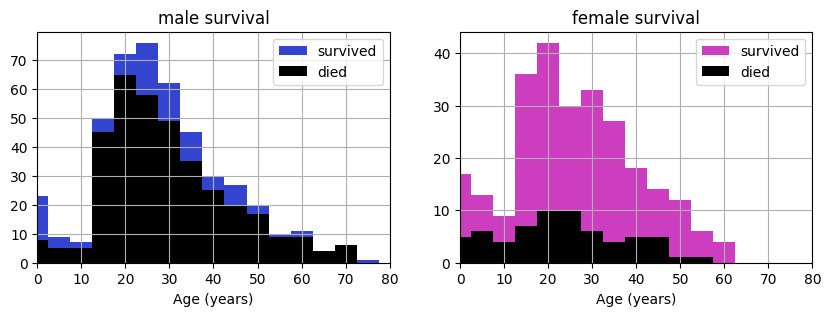

In [26]:
# Now plot the data
bins = mybins[:-1]
plt.figure(figsize=(10,3))
for i, sex, color in zip((0, 1),
                         ('male', 'female'),
                         ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color,
            width=5, label='survived')
    plt.bar(bins, D[sex], color='k', width=5, label='died')
    plt.xlim(0, 80)
    plt.grid(None)
    plt.title(sex + " survival")
    plt.xlabel("Age (years)")
    plt.legend()

- Let's try to train a `LogisticRegression` classifier. We first need to create a **train and a test dataset**.

In [29]:
# Split X and y into train and test datasets
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y)
y_test

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0], dtype=int32)

In [31]:
# Instantiate the classifier / 'Create the model'
logreg = lm.LogisticRegression()

- Train the model (**fit**) and get the predicted values (**predict**) on the test set.

In [34]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)
y_predicted

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0], dtype=int32)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.7932960893854749

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       104
           1       0.76      0.75      0.75        75

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted))

[[86 18]
 [19 56]]


# **Support Vector Machines (SVM)**


In [38]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.svm as svm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

* We generate 2D points and assign a binary label according to a linear operation on the coordinates.

In [39]:
X = np.random.randn(200, 2)  # 200 x 2 data
y = (X[:, 0] + X[:, 1]) > 1 # Imagine an AND function

X[:10], y[:10]

(array([[-1.31129103, -0.77842117],
        [ 0.5547885 , -0.77116033],
        [ 1.47195317,  0.18434179],
        [ 0.34172514,  0.32035957],
        [ 0.00773898, -0.45428149],
        [ 1.66241045,  0.1102614 ],
        [-1.08059932,  0.7781104 ],
        [ 1.05484965,  0.62775506],
        [-1.33958472,  1.223851  ],
        [-2.03920482, -1.08354718]]),
 array([False, False,  True, False, False,  True, False,  True, False,
        False]))

* Fit a linear Support Vector Classifier (SVC)

- SVC and SVR functions

In [40]:
est = svm.LinearSVC()
est.fit(X, y)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [41]:
# Generate a grid in the square [-3,3 ]^2
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# This function takes a SVM estimator as input
def plot_decision_function(est, X, y):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap = plt.cm.Blues

    # Display the decision function on the grid
    plt.figure(figsize=(5,5));
    plt.imshow(Z,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap)

    # Display the boundaries
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

    # Display the points with their true labels
    plt.scatter(X[:, 0], X[:, 1], s=30, c=.5+.5*y, lw=1,
                cmap=cmap, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--')
    plt.axvline(0, color='k', ls='--')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])

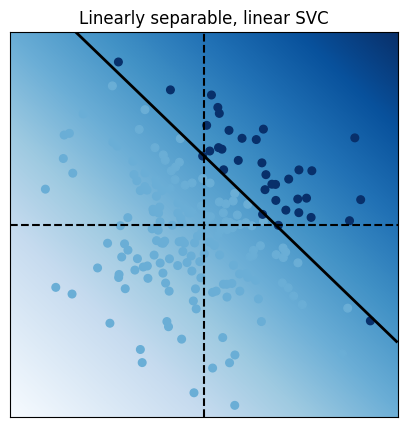

In [42]:
plot_decision_function(est, X, y)
plt.title("Linearly separable, linear SVC");

The linear SVC tried to separate the points with a line and it did a good job.

* We now modify the labels with a XOR function.
* A point's label is 1 if the coordinates have different signs. This classification is not linearly separable. Therefore, a linear SVC fails completely.

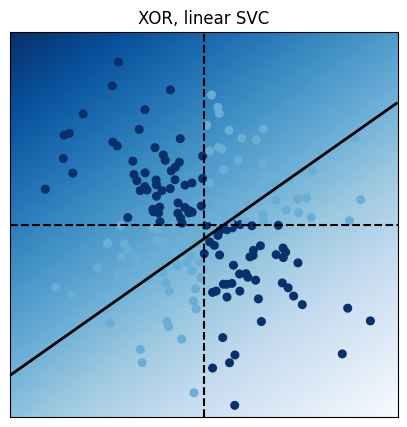

In [48]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est2 = svm.LinearSVC()
est2.fit(X, y)

plot_decision_function(est2, X, y);
plt.title("XOR, linear SVC");

* It is possible to use non-linear SVCs by using non-linear kernels.

* Kernels specify a non-linear transformation of the points into a higher-dimensional space. Transformed points in this space are assumed to be more linearly separable, although they are not necessarily in the original space.

* By default, the SVC classifier in scikit-learn uses the Radial Basis Function (RBF) kernel.

Text(0.5, 1.0, 'XOR, non-linear SVC')

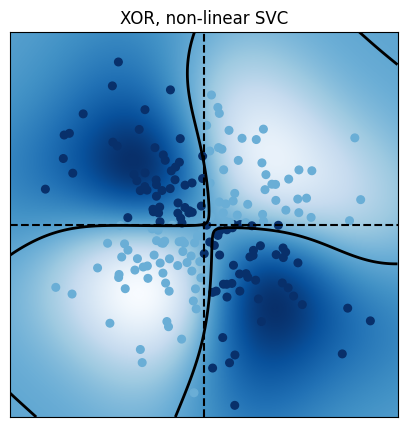

In [52]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est3 = svm.SVC()
est3.fit(X,y)

plot_decision_function(est3, X, y)
plt.title("XOR, non-linear SVC")

In [50]:
np.logspace(-3., 3., 10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

- **Hyper-parameter Tuning**

Score: 0.950


Text(0.5, 1.0, 'XOR, non-linear SVC')

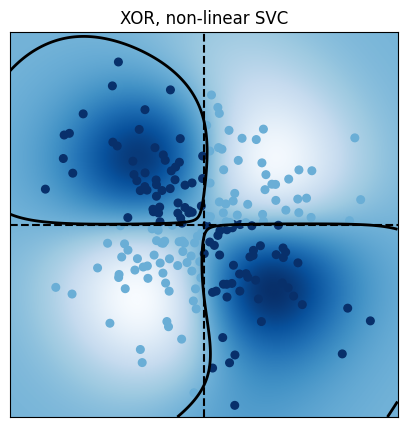

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split

est4 = GridSearchCV(svm.SVC(),
                      {'C': np.logspace(-3., 3., 10),
                       'gamma': np.logspace(-3., 3., 10)}, cv=5);
# cv = 5 ==> K = 5 for K-fold cross-validation
est4.fit(X, y)

print("Score: {0:.3f}".format(
      cv.cross_val_score(est4, X, y).mean()))

# Best model out of 100 models => the one with highest accuracy
plot_decision_function(est4.best_estimator_, X, y)
plt.title("XOR, non-linear SVC")

**Applying SVM on IRIS dataset**

In [55]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [56]:
X.shape # N x D

(150, 4)

In [57]:
np.unique(y) # multi-class classification

array([0, 1, 2])

In [58]:
y[:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

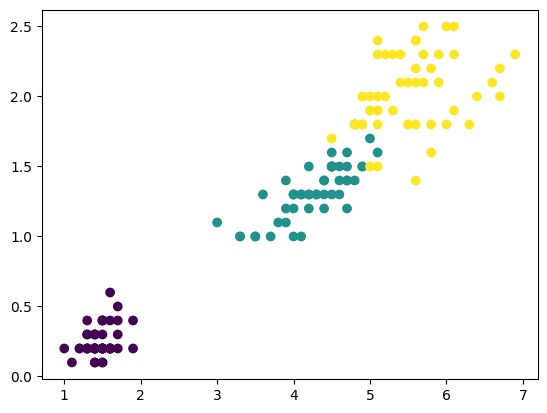

In [59]:
plt.scatter(X[:, 2], X[:, 3], c=y) # Visualize the first two features

* Let's do **hyper-parameter tuning**
* Use **5-fold cross validation to perform grid search to calculate optimal hyper-parameters**

In [62]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as cv
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Split the dataset
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
X_train.shape

(112, 4)

In [67]:
# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

# Tuning hyper-parameters



,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'C': [1, 10, ...], 'gamma': [0.0001, 0.001, ...], 'kernel': ['rbf']}, {'C': [1, 10, ...], 'kernel': ['linear']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : t

In [69]:
print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on training set:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on training set:

0.439 (+/-0.255) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.439 (+/-0.255) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.911 (+/-0.114) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.439 (+/-0.255) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.114) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.955 (+/-0.100) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.911 (+/-0.114) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.946 (+/-0.134) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0

In [70]:
print("Detailed classification report:")
print()
print("The model is trained on the training set.")
print("The scores are computed on the testing set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the training set.
The scores are computed on the testing set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38




In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

In [72]:
print(y_true[:60])
print(y_pred[:60])

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


## **Exercise: SVM for Titanic dataset**

In [ ]:
# Titanic with SVM

import numpy as np
import pandas as pd
import sklearn.svm as svm
import sklearn.model_selection as cv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

titanic = None

data = titanic[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = None
data = data.dropna()
data.head()

# Create X and Y
data_np = data.astype(np.int32).values
X = None
y = None

# Split the dataset
X_train, X_test, y_train, y_test = None

# Set the parameters by cross-validation
parameters = None

# Perform Grid Search
print("# Tuning hyper-parameters")
clf = None

# Fit
None

# Display the best parameters
print("Best parameters set found on training set:")
print()
print(clf.None)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Predict on test data
y_true, y_pred = None, None

# Show the classification report
print(classification_report(None, None))
print(accuracy_score(None, None))

# **Principal Component Analysis (PCA)**

In [73]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[1,-1], [0,1], [-1,0]])
print(X)

[[ 1 -1]
 [ 0  1]
 [-1  0]]


In [75]:
pca = PCA()

pca.fit(X)

# Percentage of variance explained by each component
print(pca.explained_variance_ratio_)

[0.75 0.25]


In [76]:
# Transform original data
X_new = pca.transform(X)

print(X_new)

[[ 1.41421356e+00 -3.33066907e-16]
 [-7.07106781e-01  7.07106781e-01]
 [-7.07106781e-01 -7.07106781e-01]]


## **Applying PCA to the IRIS dataset**

(150, 4)


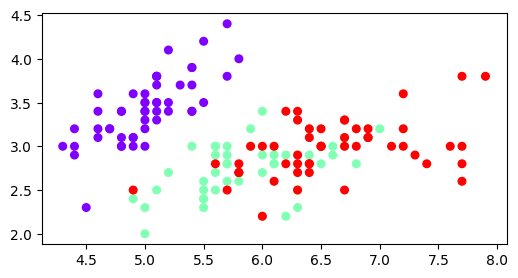

In [77]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline

iris = ds.load_iris()
X = iris.data
y = iris.target

print(X.shape)

plt.figure(figsize=(6,3));
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.rainbow);

In [79]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
[0.92461872 0.05306648 0.01710261 0.00521218]


In [80]:
print(X_pca.shape)

(150, 4)


In [89]:
X_pca[:,3]
# observe that dimensions 2 and 3 are almost zero values
# (change 0th column to 1st or 2nd or 3rd)

array([ 2.26243707e-03,  9.90265503e-02,  1.99683897e-02, -7.55758166e-02,
       -6.12585926e-02, -2.42008576e-02, -4.81431065e-02, -4.52978706e-02,
       -2.67447358e-02, -5.62954013e-02, -1.50199245e-02, -1.56379208e-01,
       -7.88791149e-03, -2.16798118e-02,  1.59209718e-01,  6.55154587e-03,
        1.67734737e-01,  7.76281796e-02,  2.70518681e-02, -6.62726502e-02,
       -1.50707908e-02,  4.10654027e-02,  4.48212505e-03,  1.48352589e-01,
       -3.00330904e-01,  3.46074722e-02,  5.74497158e-02, -1.41727423e-02,
        6.57834667e-02, -1.23983306e-01, -6.04622767e-02,  2.31628492e-01,
       -2.81372347e-01, -9.53488583e-02,  1.90703413e-02,  1.62598446e-01,
        1.76441213e-01, -1.68173054e-01, -1.07331474e-02, -1.37491513e-02,
        9.40633590e-02,  3.19987487e-01, -7.46777682e-02,  1.76208890e-01,
       -1.82842502e-01,  1.42843574e-01, -1.89622291e-01, -5.95642283e-02,
       -4.65686438e-02,  3.46583385e-02,  1.85252879e-02,  5.66512106e-04,
       -1.65317587e-03,  

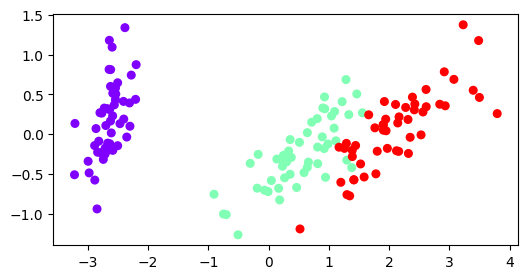

In [90]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=30, cmap=plt.cm.rainbow);

# **PCA and Logistic Regression Classifier**

In [91]:
# Split the data into 70% training and 30% test subsets
import sklearn.model_selection as cv

X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [92]:
# Apply PCA (2 components) on X_train_std
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)

In [93]:
# Transform X_test using PCA
X_test_pca = pca.transform(X_test)

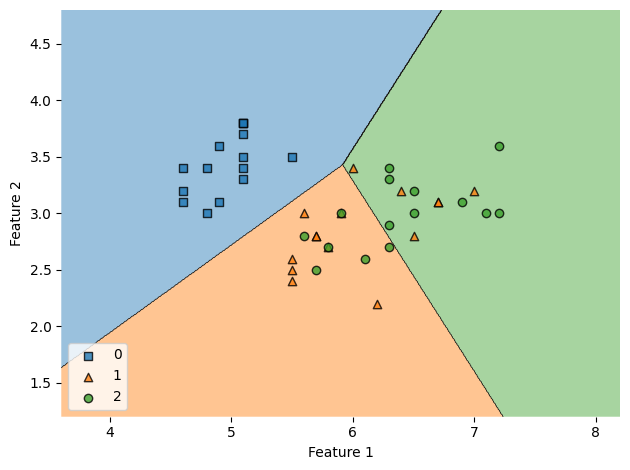

In [96]:
# Train Logistic Regression classifier **without using PCA**

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

lr_no_pca = LogisticRegression()

lr_no_pca = lr_no_pca.fit(X_train[:,:2], y_train)

# Test the model
plot_decision_regions(X_test[:,:2], y_test, clf = lr_no_pca)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

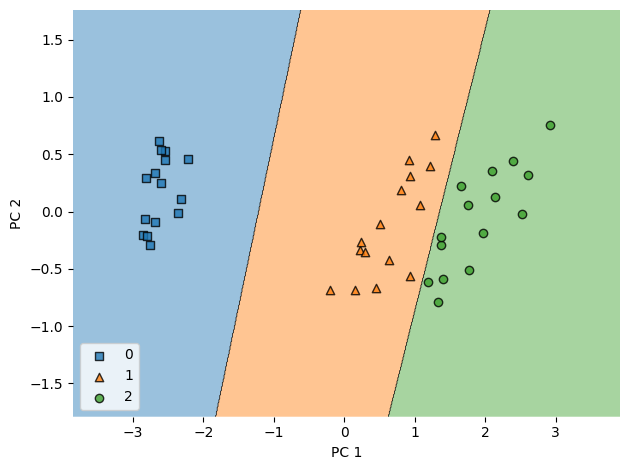

In [97]:
# Train Logistic Regression classifier using the first 2 principal components

lr_pca = LogisticRegression()

lr_pca = lr_pca.fit(X_train_pca, y_train)

# Test the model
plot_decision_regions(X_test_pca, y_test, clf = lr_pca)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# **K-Means Clustering**

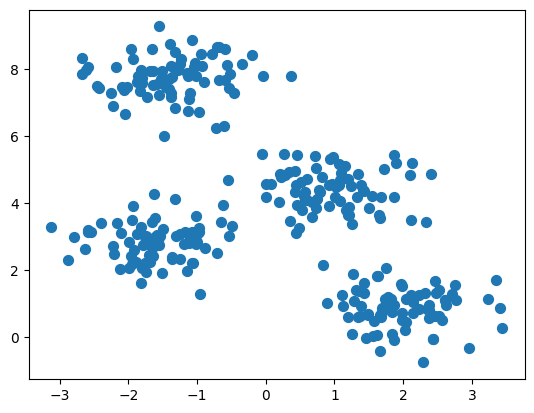

In [102]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:,0], X[:,1], s=50);

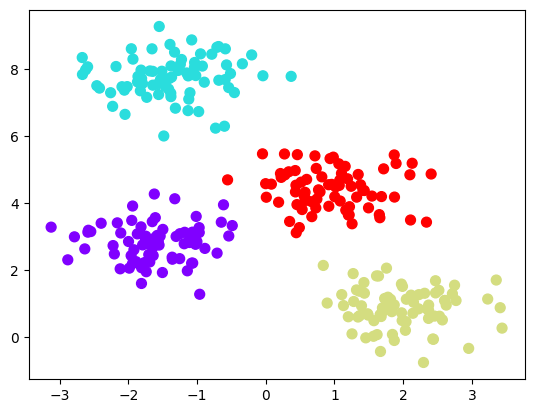

In [109]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=4)

est.fit(X)

y_kmeans = est.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='rainbow');

In [110]:
est.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

## **Applying K-Means to the Digits dataset**

In [111]:
from sklearn.datasets import load_digits
digits = load_digits()

In [112]:
len(digits.data)

1797

In [113]:
est = KMeans(n_clusters=10)

clusters = est.fit_predict(digits.data)

est.cluster_centers_.shape

(10, 64)

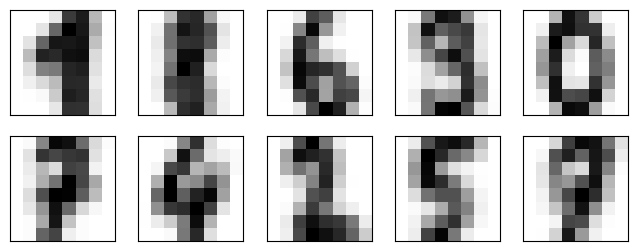

In [114]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)